In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


* In titanic dataset of seaborn library, 'survived' column gives information about the individual survived or not.
* The distribution of survived people's age is plotted as below:

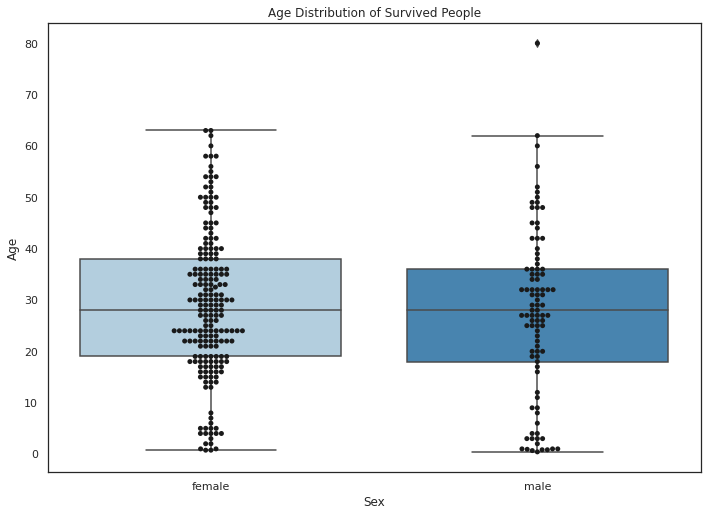

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_theme(style='white')

ax = sns.boxplot(data=titanic[titanic['survived']==1], 
                 x= 'sex', 
                 y= 'age',
                 palette="Blues")

ax = sns.swarmplot(data=titanic[titanic['survived']==1], 
                 x= 'sex', 
                 y= 'age',
                 color="0.10").set(title="Age Distribution of Survived People", 
                                       xlabel="Sex",
                                       ylabel="Age")

* As per the plot, the average age of survived female is nearly equal to 28 and average age of male is nearly equal to 27.

In [ ]:
avg_age = pd.pivot_table(titanic[(titanic['survived']== 1) ],
               index =['sex'], 
               values=['age'], 
               aggfunc= 'mean')

np.round(avg_age, 2)

,age
sex,
female,28.85
male,27.28


* The percentage distribution of the gender of the people who survived from the titanic.

In [ ]:
gender_dist=pd.pivot_table(titanic,
                                 index =['sex'], 
                                 values=['survived'], 
                                 aggfunc= 'sum')

gender_dist['% survived'] = gender_dist['survived']*100/gender_dist['survived'].sum()

np.round(gender_dist.drop('survived', axis=1),2)

,% survived
sex,
female,68.13
male,31.87


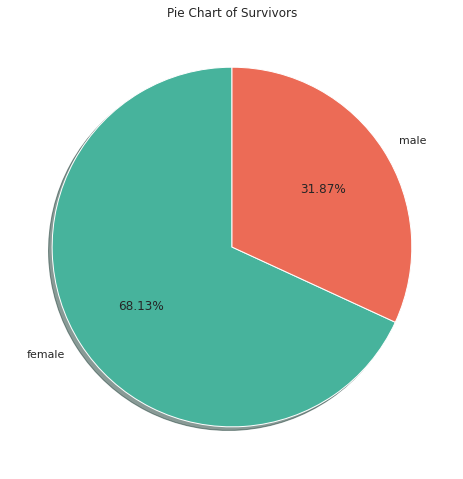

In [ ]:
plt.pie(gender_dist['% survived'],
        labels=gender_dist.index,
        autopct='%1.2f%%',
        shadow=True,
        startangle=90,
        colors=["#47B39C", "#EC6B56"])
plt.title("Pie Chart of Survivors")
plt.show()

## Part 2: Data Visualization 

Before you start: Read the book chapter “Data Visualization”.


**Note: Please make sure your plots are complete and presentable with a title, proper axis names and legends if applicable.**

### Problem 3

Dataset: Forest fires

Source: https://archive.ics.uci.edu/ml/datasets/Forest+Fires

The file forestfires.csv includes data from Cortez and Morais (2007).

Number of instances and attributes are 517 and 13 respectively.  

Attribute Information:
1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
3. month - month of the `year`: 'jan' to 'dec'
4. day - day of the week: 'mon' to 'sun'
5. FFMC - FFMC index from the FWI system: 18.7 to 96.20
6. DMC - DMC index from the FWI system: 1.1 to 291.3
7. DC - DC index from the FWI system: 7.9 to 860.6
8. ISI - ISI index from the FWI system: 0.0 to 56.10
9. temp - temperature in Celsius degrees: 2.2 to 33.30
10. RH - relative humidity in %: 15.0 to 100
11. wind - wind speed in km/h: 0.40 to 9.40
12. rain - outside rain in mm/m2 : 0.0 to 6.4
13. area - the burned area of the forest (in ha): 0.00 to 1090.84

(this output variable is very skewed towards 0.0, thus it may make sense to model with the logarithm transform).


In [ ]:
#Importing libraries and loading the dataset 'forestfires.csv'

import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files
file = files.upload()  #upload file into google colab session
df = pd.read_csv("forestfires.csv") 
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


**TODO1:** Plot a stacked bar chart to show the number of forest fires grouped by months and days of the week. *(Make sure the month are in Months chronological order i.e attribute values are sorted starting with January and ending with December)* 

Text(0.5, 1.0, 'Number of Forest Fires')

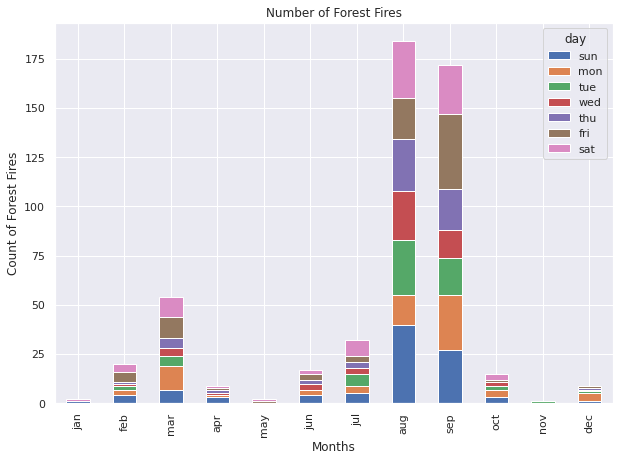

In [ ]:
from numpy.core.fromnumeric import size

table = pd.pivot_table(df, values = 'X', index = 'month', columns = 'day', aggfunc=size, fill_value = 0)

new_order_month = ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']
new_order_week = ['sun','mon','tue','wed','thu','fri','sat']

table = table.reindex(new_order_month)
table = table.reindex(new_order_week, axis = 1)
table.plot(kind = 'bar', stacked = True, figsize = (10,7))

plt.xlabel('Months')
plt.ylabel('Count of Forest Fires')
plt.title('Number of Forest Fires')

**Hint:** Before creating the bar chart, use aforementioned data aggregation tools to transform the original dataset to the data frame you need for this section. To be more specific, you need to compute the count of forest fires by months and days before plotting.

Then [build a stacked bar chart with Pandas](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html)

**TODO2 (not graded):** Do you notice any problem with the stacked bar chart? How do you plan to remedy this problem?

**TODO3:** Create a scatter plot of the fires with the location(X & Y) as the X and Y axis, and the size of the point indicating the area burnt. 

Text(0.5, 1.0, 'Fires with the Location')

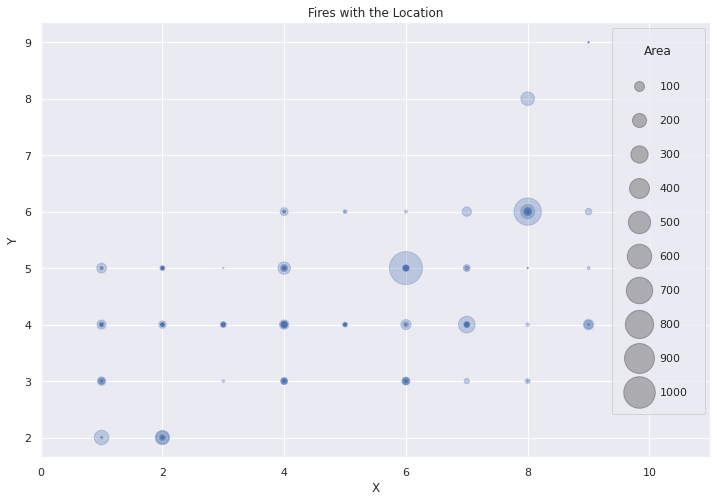

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)

scatter = ax.scatter(df['X'], df['Y'], s=df['area'], alpha = 0.3)

handles, labels = scatter.legend_elements(prop="sizes", alpha=0.3)
legend = ax.legend(handles, labels, loc="upper right",
                   title="Area", labelspacing = 2, borderpad = 1.5)

plt.xlabel('X')
plt.ylabel('Y')
plt.xlim(0,11)
plt.title('Fires with the Location')

**Hint:** [Build a scatter plot with Pandas](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.scatter.html)

**TODO4:** Plot the scatter matrix for temp, RH, DC and DMC. How do you interpret the result in terms of correlation among the variables?

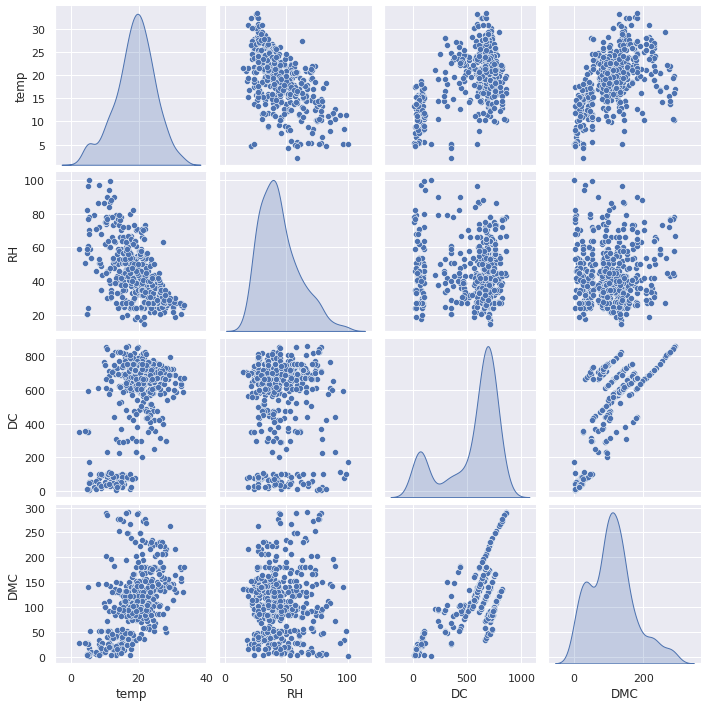

In [ ]:
sns.pairplot(df[['temp','RH','DC','DMC']], diag_kind="kde")


*   The scatter plots indicate the correlation between two variables. 
*   As we can see, an increase in the value of temp reduces the value of RH. So RH and temp are negatively correlated. On the other hand, DMC and temp as well as DC and DMC have a positive correlation.
*   There is almost no correlation between variables DMC and RH.

**Hint:** [Creat a scatter matrix with Seaborn](https://seaborn.pydata.org/generated/seaborn.pairplot.html)

**TODO5:** Does the wind speed affect the spread of wildfire? Use visualization to back up your answer.

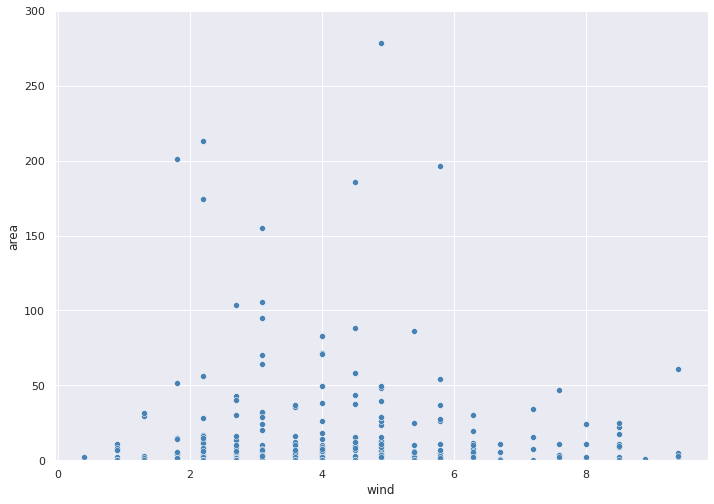

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
plot=sns.scatterplot(data=df, x= 'wind', y= 'area', color= 'steelblue')
plot.set(ylim=(0, 300))

plt.show()




*   From the scatter plot above, we can infer that as the density of the markers plots in the graph is relatively low within the range of 0 to 2 and 6 to 8, the likeliness of forest fire in low for wind speed of this range.
*   On contrary, for the windspeed range of 2 to 6, the density of plots as well as the area burned in the fire is more. And so we conclude that the wind speed affect the occurance and scope of fire.




### Problem 4


Dataset: Graduate School Admission 

This dataset was created for Graduate Admissions prediction.

The purpose is to help students with shortlisting target universities according to their profiles. 

The predicted output gives them a fair idea about their chances of admission for a particular university.

Attribute Information: 

Serial.No.: application number: 1 to 500 

GRE.Score: GRE score: 290 to 340 

TOEFL.Score: TOEFL score: 92 to 120 

University.Rating: undergraduate school’s rating: A to E 

SOP: Statement of Purpose score: 1 to 5 

LOR: Letter of Recommendation score: 1 to 5 

CGPA: Undergraduate GPA: 6.8 to 9.92 

Research: Research experience: Yes or No 

Chance.of.Admit: Chance of getting admitted: 0.34 to 0.97

In [ ]:
from google.colab import files
file = files.upload()  #upload file into google colab session
df = pd.read_csv("Admission_Predict.csv") 
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,yes,0.92
1,2,324,107,4,4.0,4.5,8.87,yes,0.76
2,3,316,104,3,3.0,3.5,8.00,yes,0.72
3,4,322,110,3,3.5,2.5,8.67,yes,0.80
4,5,314,103,2,2.0,3.0,8.21,no,0.65



**TODO1:** Is LOR score related to CGPA? Use visualization to back up your answer.

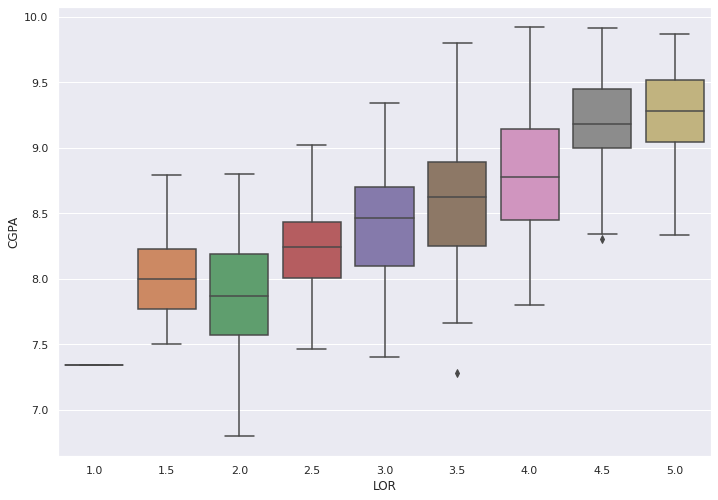

In [ ]:
df.columns = df.columns.str.replace(' ', '')

sns.boxplot(data=df, x= df['LOR'], y=df['CGPA'])

*   Here, a box plot is used to visualize the relationship between a numerical and a categorical variable.
*   From these plots we see that there is a general increasing trend in the value of the median CGPA scores with increase in the obtained LOR scores.



**Hint:** Use the visualization that is used to compare 2 numerical variables

**TODO2:** 
*   Create a scatterplot of CGPA and GRE. Use color to indicate research experience. Interpret the plot. 

*   Create a scatterplot of University.Rating vs Research. Why is the plot not useful? Pick an appropriate chart type to reveal the relationship between University.Rating and Research.


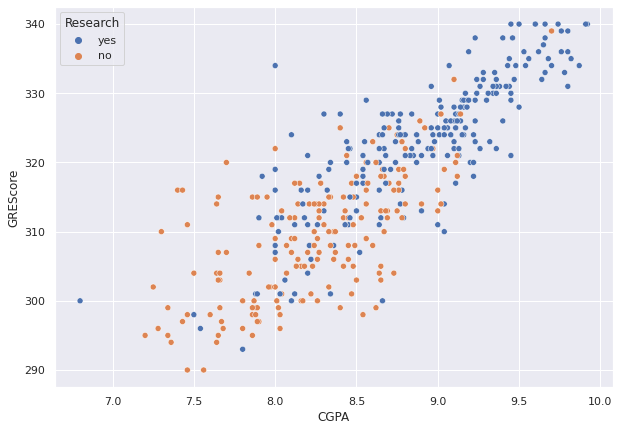

In [ ]:
sns.set(rc={'figure.figsize':(10,7)})
sns.scatterplot(data = df, x = 'CGPA', y = 'GREScore', hue = 'Research')



*   From this scatterplot we see that the cluster of applicats with no research experience are more concentrated in the region having lower CGPA and GRE scores as compared to applicants with some research experience.



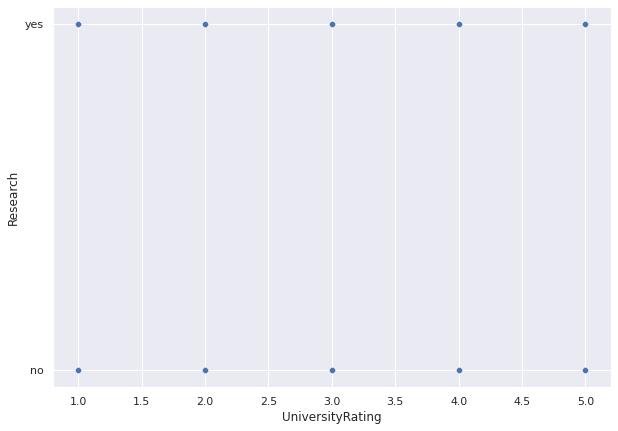

In [ ]:
sns.scatterplot(data = df, x = 'UniversityRating', y = 'Research')

*   As University Rating and Research both are categorical values, proper inferences cannot be made in this case using a scatter plot.
*   In order to make proper inferences from the given columns, we used a stacked bar graph.



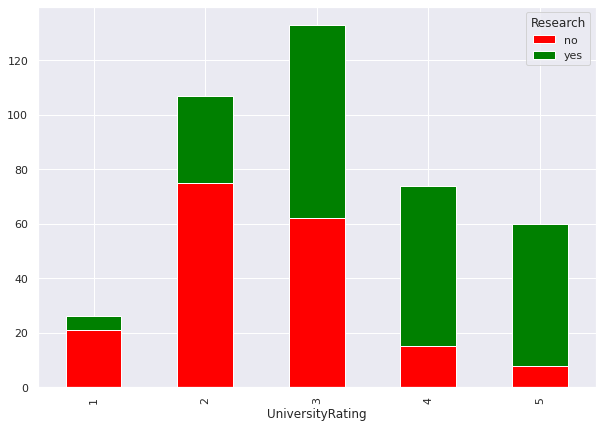

In [ ]:
table = pd.pivot_table(df, values = 'SerialNo.', 
                       index = 'UniversityRating', columns = 'Research', aggfunc = np.count_nonzero)
table.plot(kind='bar', stacked=True, color=['red', 'green'])



*   Here we see that the more the university rating, the higher are the applicants with reasearch experience, and visa verse.


**TODO3:** Plot a pie chart of University Rating. The pie chart should also present the percentage of each slice. Explain your findings. *(Make sure you show data labels)*

Text(0, 0.5, '')

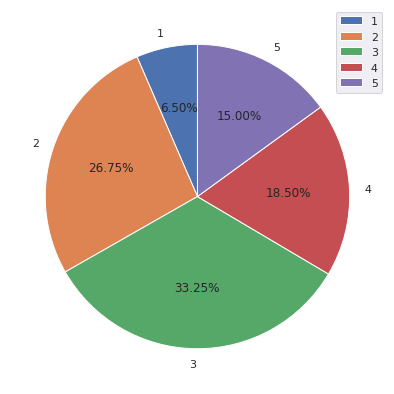

In [ ]:
count_df = df.groupby(['UniversityRating']).count()

count_df.plot.pie(y = 'SerialNo.', autopct='%1.2f%%', startangle=90)
plt.ylabel(None)



*   In this dataset, the majority of universities have a rating of 3 and it constitutes to about 33.25% of the total data.
*   The least number of universities in this dataset have a rating of 1 (6.50% of the total data).

**Hint:** [Build a pie chart with Matplotlib](https://matplotlib.org/3.1.1/gallery/pie_and_polar_charts/pie_features.html)

[Build a pie chart with Pandas](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.pie.html)

**TODO4:** What other insights can you draw from this dataset? Present one finding with visualization.

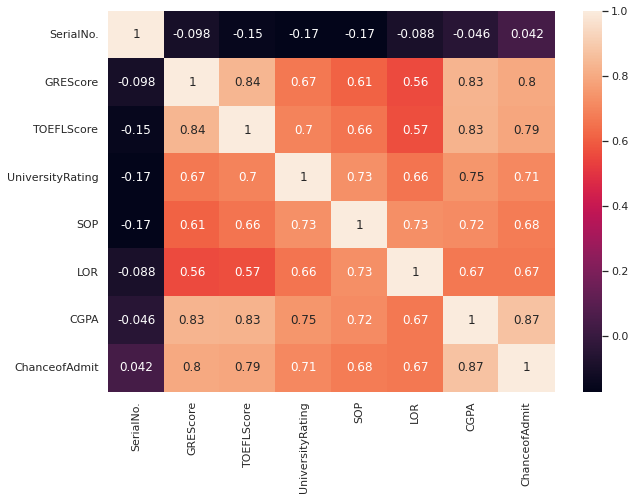

In [ ]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot = True)



*   The heatmap indicates the relationship between various numerical variables of dataset.
*   As we can see that Chance of Admit have strong correlation with CGPA while weak correlation with SOP score.
*   Also there is strong correlation between CGPA and GRE-TOEFL score. Which indicates that applicants with higher CGPA have higher GRE and TOEFL score. 




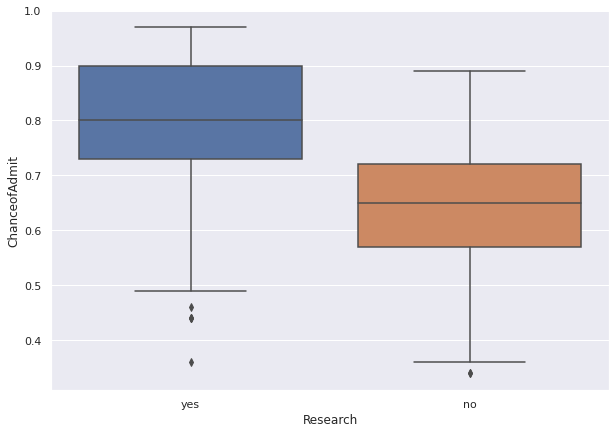

In [ ]:
sns.boxplot(data=df, x= df['Research'], y=df['ChanceofAdmit'])

 

*   If an applicant has research experience, their chances of getting an acceptance increases significantly.
*   The chances of getting an acceptance for an applicant with research experience is about 80% where as the chances of getting an acceptance for an applicant with no research experience is about 65%.

